# Exercise 4.9-2

## Task 1 Import necessary libraries & up-to-date project data

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# Set path
path = r"C:\Users\tiffk\Instacart Basket Analysis 22-05-2024"

In [4]:
# Import newest project data
ords_prods_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))

In [6]:
# Check imported data
pd.options.display.max_columns = None
ords_prods_all.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,add_to_cart_order,reordered,merge_1,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,user_mean_product_price,spending_flag,median_days_between_orders,frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income,merge_2
0,196,Soda,77,7,9.0,2539329,1,1,2,8,NaN,True,1,0,both,Mid-range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
1,12427,Original Beef Jerky,23,19,4.4,2539329,1,1,2,8,NaN,True,3,0,both,Low-range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
2,14084,Organic Unsweetened Vanilla Almond Milk,91,16,12.5,2539329,1,1,2,8,NaN,True,2,0,both,Mid-range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
3,26088,Aged White Cheddar Popcorn,23,19,4.7,2539329,1,1,2,8,NaN,True,4,0,both,Low-range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
4,26405,XL Pick-A-Size Paper Towel Rolls,54,17,1.0,2539329,1,1,2,8,NaN,True,5,0,both,Low-range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both


In [7]:
ords_prods_all.shape

(32399732, 32)

## Task 2 Create a bar chart, histogram, scatterplot; Plus line chart with sample subset

### Bar Charts

<Axes: xlabel='orders_day_of_week'>

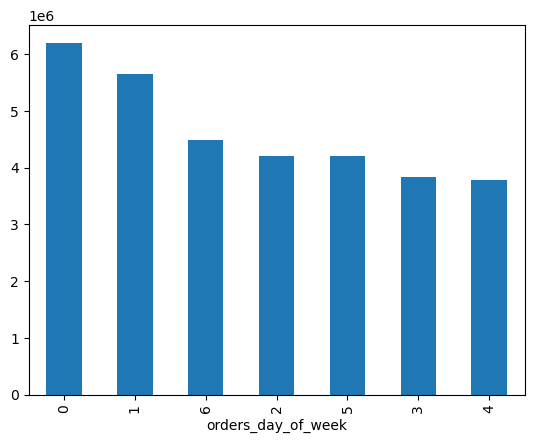

In [8]:
# Creating simple bar chart
ords_prods_all['orders_day_of_week'].value_counts().plot.bar()

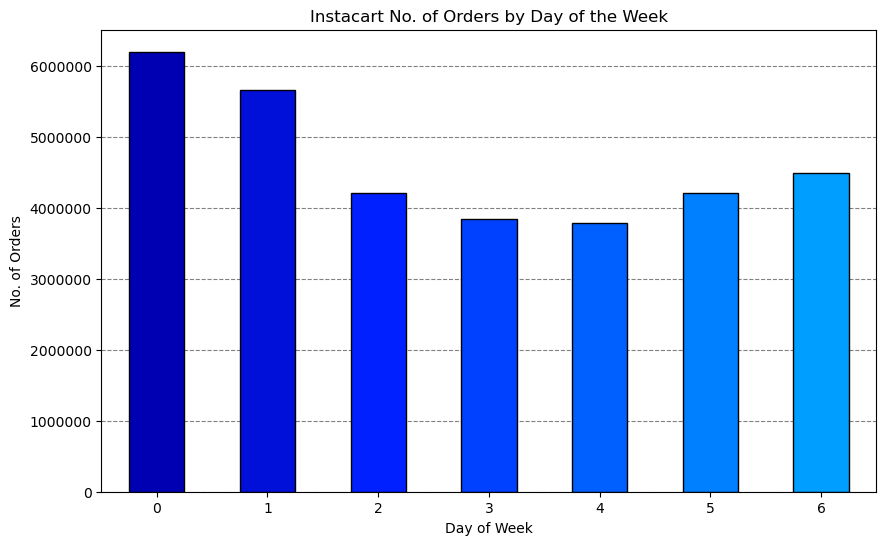

In [40]:
# Ordering columns based on index (chronological order)
plt.figure(figsize = (10,6))
plt.ticklabel_format(style='plain')
ords_prods_all['orders_day_of_week'].value_counts().sort_index().plot.bar(color = ['#0000b3', '#0010d9', '#0020ff', '#0040ff', '#0060ff', '#0080ff', '#009fff'],
                                                                          zorder = 2, 
                                                                          edgecolor = 'black')
                                                                         
plt.title('Instacart No. of Orders by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('No. of Orders')
plt.xticks(rotation = 0)
plt.grid(axis = 'y', color = 'gray', linestyle = 'dashed')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'instacart_orders_by_day.png'), bbox_inches = 'tight')

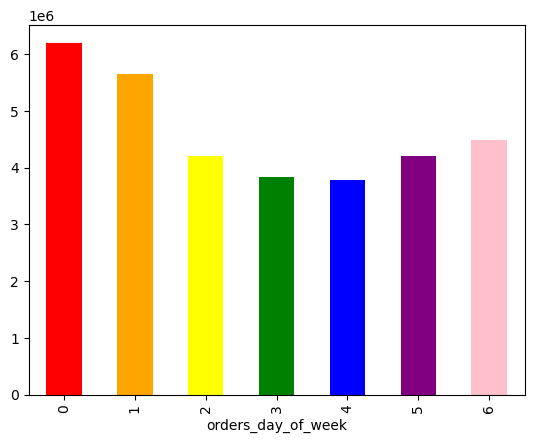

In [41]:
# Colouring columns, sorting by index, and saving as an object
bar = ords_prods_all['orders_day_of_week'].value_counts().sort_index().plot.bar(
    color = ['red', 'orange', 'yellow', 'green', 'blue', 'purple', 'pink'])

### Histogram

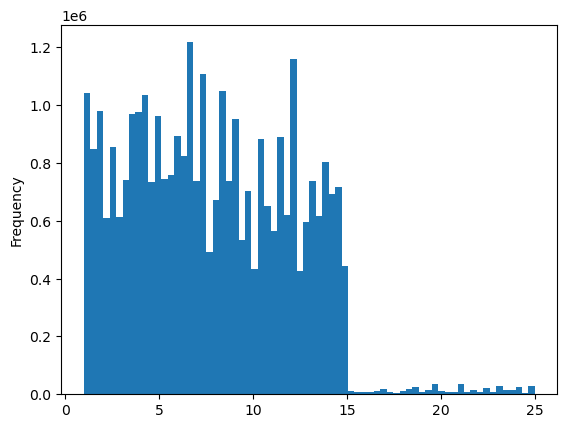

In [11]:
# Create and save histogram as an object
hist = ords_prods_all['prices'].plot.hist(bins = 70)

### Scatterplot

<Axes: xlabel='prices', ylabel='prices'>

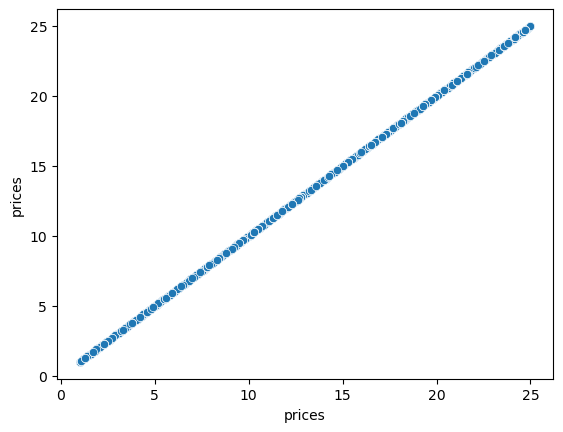

In [12]:
# Use scatterplot to check for outlier values in the prices column
sns.scatterplot(x = 'prices', y = 'prices', data = ords_prods_all)

### Line Chart

In [13]:
# Start with sampling data by setting a seed
np.random.seed(4)

In [14]:
# Create list to divide dataset into a big and small representative sample:
dev = np.random.rand(len(ords_prods_all)) <= 0.7

In [15]:
# Create small sample dataframe:
small = ords_prods_all[~dev]

In [18]:
# Create big sample dataframe
big = ords_prods_all[dev]

In [19]:
# Check number of rows in small & big dataframe add up to OG dataframe
len(ords_prods_all)

32399732

In [20]:
len(big) + len(small)

32399732

In [21]:
# Small sample reduced rows for line chart
df_2 = small[['orders_day_of_week', 'prices']]

C:\Users\tiffk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tiffk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


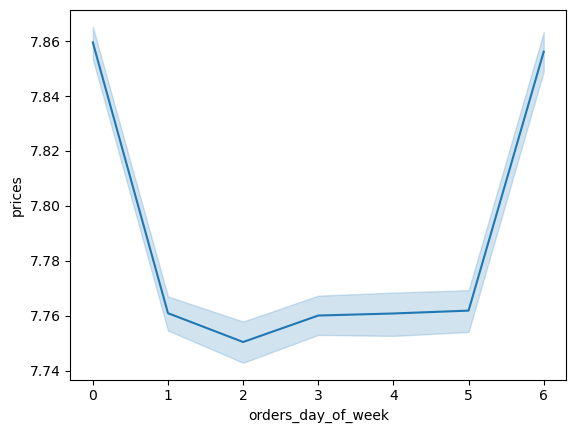

In [22]:
# Create line chart
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

## Task 3 Create histogram for “order_hour_of_day” column

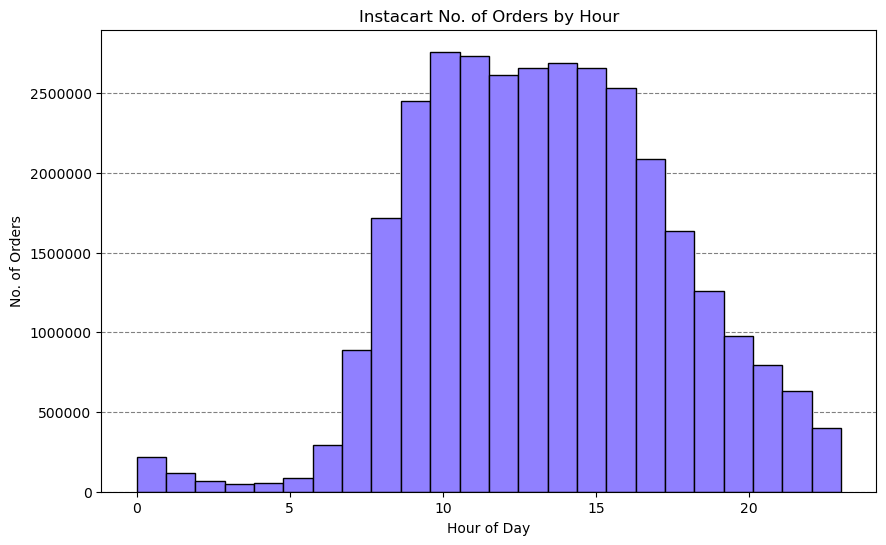

In [51]:
hist_2 = plt.figure(figsize = (10,6))
plt.ticklabel_format(style='plain')
ords_prods_all['order_hour_of_day'].plot.hist(bins = 24, 
                                              color = ['#9080ff'],
                                              zorder = 2, 
                                              edgecolor = 'black')
plt.title('Instacart No. of Orders by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('No. of Orders')
plt.grid(axis = 'y', color = 'gray', linestyle = 'dashed')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'instacart_orders_by_hour.png'), bbox_inches = 'tight')


The majority of orders occur during typical business hours, from 8 or 9 am to 4 or 5 pm, with most during the middle of the day from 10 am to 3 pm.
Shoppers may be ordering during lunch breaks or immediately after their work day. Breaking down the days of the week could show if weekend behaviors are the same. As expected, few orders happen overnight and in the very early morning.

## Task 4 Create bar chart from “loyalty_flag” column

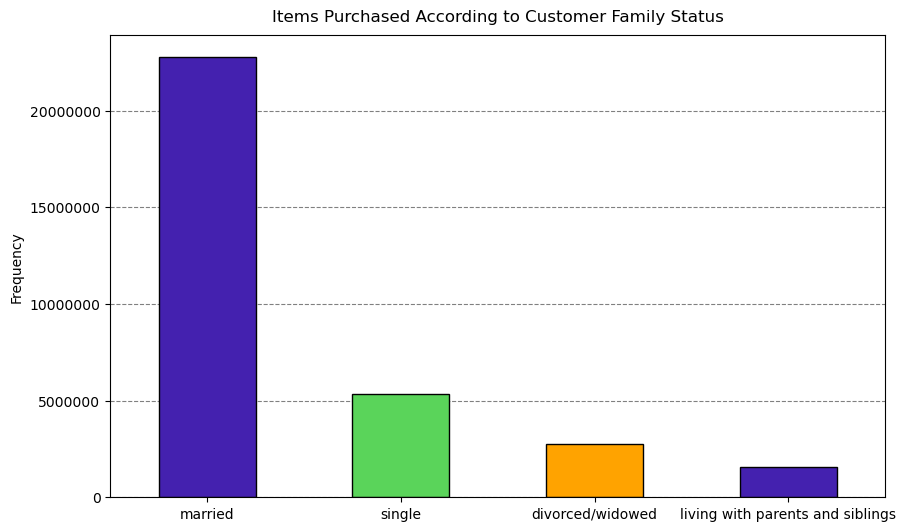

In [5]:
bar_2 = plt.figure(figsize = (10,6))
plt.ticklabel_format(style='plain')
ords_prods_all['fam_status'].value_counts().plot.bar(color = ['#4421af', '#5ad45a', '#ffa300'],
                                                       zorder = 2, 
                                                       edgecolor = 'black')
plt.title('Items Purchased According to Customer Family Status', pad=10)
plt.xlabel('')
plt.ylabel('Frequency')
plt.xticks(rotation=0) 
plt.grid(axis = 'y', color = 'gray', linestyle = 'dashed')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'instacart_familystat_vs_total_item2.png'), bbox_inches = 'tight')

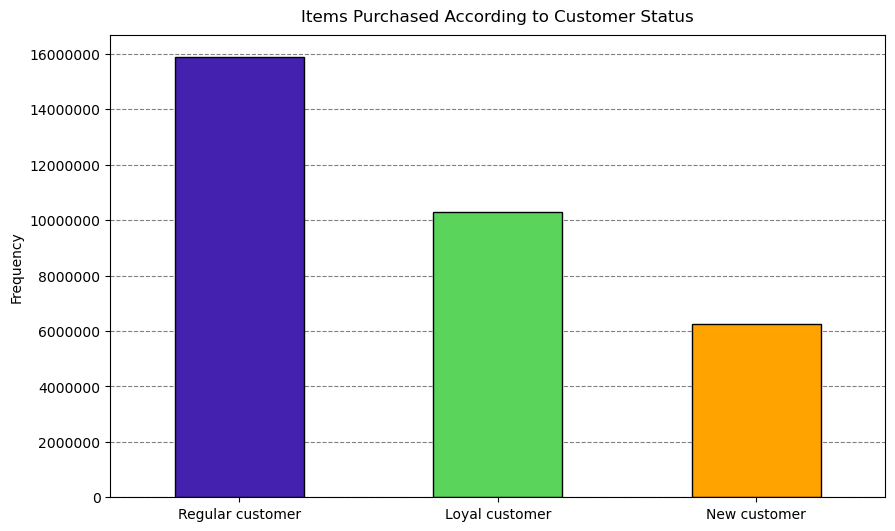

In [4]:
bar_2 = plt.figure(figsize = (10,6))
plt.ticklabel_format(style='plain')
ords_prods_all['loyalty_flag'].value_counts().plot.bar(color = ['#4421af', '#5ad45a', '#ffa300'],
                                                       zorder = 2, 
                                                       edgecolor = 'black')
plt.title('Items Purchased According to Customer Status', pad=10)
plt.xlabel('')
plt.ylabel('Frequency')
plt.xticks(rotation=0) 
plt.grid(axis = 'y', color = 'gray', linestyle = 'dashed')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'instacart_loyalty_vs_total_item2.png'), bbox_inches = 'tight')

In [ ]:
bar_2 = plt.figure(figsize = (10,6))
plt.ticklabel_format(style='plain')
ords_prods_all['loyalty_flag'].value_counts().plot.bar(color = ['#4421af', '#5ad45a', '#ffa300'],
                                                       zorder = 2, 
                                                       edgecolor = 'black')
plt.title('Customers by Loyalty Status', pad=10)
plt.xlabel('')
plt.ylabel('Frequency')
plt.xticks(rotation=0) 
plt.grid(axis = 'y', color = 'gray', linestyle = 'dashed')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'instacart_loyalty_vs_total_item2.png'), bbox_inches = 'tight')

In [4]:
# Create Region column - organize by state and region
northeast_region = ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'New Jersey', 'New York', 'Pennsylvania', 'Rhode Island', 'Vermont' ]

In [5]:
midwest_region = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']

In [6]:
south_region = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']

In [7]:
west_region = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [8]:
# Create region columns
ords_prods_all.loc[ords_prods_all['state'].isin(northeast_region), 'region'] = 'Northeast'

In [9]:
ords_prods_all.loc[ords_prods_all['state'].isin(midwest_region), 'region'] = 'Midwest'

In [10]:
ords_prods_all.loc[ords_prods_all['state'].isin(south_region), 'region'] = 'South'

In [11]:
ords_prods_all.loc[ords_prods_all['state'].isin(west_region), 'region'] = 'West'

In [24]:
# Check data
ords_prods_all['region'].value_counts(dropna = False)

region
South        10790096
West          8291679
Midwest       7596065
Northeast     5721892
Name: count, dtype: int64

In [13]:
# Exclude customers w/ max_order less than 5 
ords_prods_all.loc[ords_prods_all['max_order'] < 5, 'exclusion_flag'] = 'Exclude'

In [14]:
# Keep customers where max_order is greater than or equal to 5
ords_prods_all.loc[ords_prods_all['max_order'] >= 5, 'exclusion_flag'] = 'Keep'

In [15]:
# Check frequencies
ords_prods_all['exclusion_flag'].value_counts(dropna = False)

exclusion_flag
Keep       30959687
Exclude     1440045
Name: count, dtype: int64

In [16]:
# Check exclusion flag using crosstab
exclusion_flag_check = pd.crosstab(ords_prods_all['exclusion_flag'], ords_prods_all['max_order'], dropna = False)

In [17]:
exclusion_flag_check.to_clipboard()

In [18]:
# Create sample without 'exclude' rows called ords_prods_in
ords_prods_all_in = ords_prods_all[ords_prods_all['exclusion_flag'] == 'Keep']

In [19]:
# Export Sample
ords_prods_all_in.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_in_sample.pkl'))

In [20]:
ords_prods_all_in.loc[ords_prods_all_in['age'] <= 29, 'age_group'] = 'Young Adult'

C:\Users\tiffk\AppData\Local\Temp\ipykernel_22140\891740858.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_all_in.loc[ords_prods_all_in['age'] <= 29, 'age_group'] = 'Young Adult'


In [21]:
ords_prods_all_in.loc[(ords_prods_all_in['age'] >= 30) & 
                    (ords_prods_all_in['age'] < 40), 'age_group'] = 'Adult'

In [22]:
ords_prods_all_in.loc[(ords_prods_all_in['age'] >= 40) & 
                    (ords_prods_all_in['age'] < 50), 'age_group'] = 'Middle Age'

In [23]:
ords_prods_all_in.loc[(ords_prods_all_in['age'] >= 50) & 
                    (ords_prods_all_in['age'] < 65), 'age_group'] = 'Senior'

In [24]:
ords_prods_all_in.loc[(ords_prods_all_in['age'] >= 65), 'age_group'] = 'Elderly'

In [25]:
ords_prods_all_in.loc[ords_prods_all_in['income'] <= 50000, 'income_group'] = 'Low'

C:\Users\tiffk\AppData\Local\Temp\ipykernel_22140\3862173747.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_all_in.loc[ords_prods_all_in['income'] <= 50000, 'income_group'] = 'Low'


In [26]:
ords_prods_all_in.loc[(ords_prods_all_in['income'] > 50000) & 
                    (ords_prods_all_in['income'] <= 100000), 'income_group'] = 'Middle'

In [27]:
ords_prods_all_in.loc[ords_prods_all_in['income'] > 100000, 'income_group'] = 'High'

In [28]:
ords_prods_all_in.loc[ords_prods_all_in['n_dependants'] == 0, 'dependents_flag'] = 'No Dependents'

C:\Users\tiffk\AppData\Local\Temp\ipykernel_22140\558603567.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_all_in.loc[ords_prods_all_in['n_dependants'] == 0, 'dependents_flag'] = 'No Dependents'


In [29]:
# Ensure it is a copy
ords_prods_all_in = ords_prods_all_in.copy()

# Update 'dependents_flag' where 'n_dependants' is greater than 0
ords_prods_all_in.loc[ords_prods_all_in['n_dependants'] > 0, 'dependents_flag'] = 'Has Dependents'

# Update 'dependents_flag' where 'n_dependants' is 0
ords_prods_all_in.loc[ords_prods_all_in['n_dependants'] == 0, 'dependents_flag'] = 'No Dependents'


In [30]:
# Create a unique user_id sample and take relevant columns
user_sample = ords_prods_all_in[['user_id', 'age_group', 'income_group', 'dependents_flag', 'region', 'loyalty_flag']]

In [31]:
# Remove duplicate rows in the user_sample to obtain a sample of all unique customers
user_sample = user_sample.drop_duplicates()

In [12]:
ords_prods_all_in.loc[ords_prods_all_in['age'] <= 29, 'age_group'] = 'Young Adult'

NameError: name 'ords_prods_all_in' is not defined

C:\Users\tiffk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


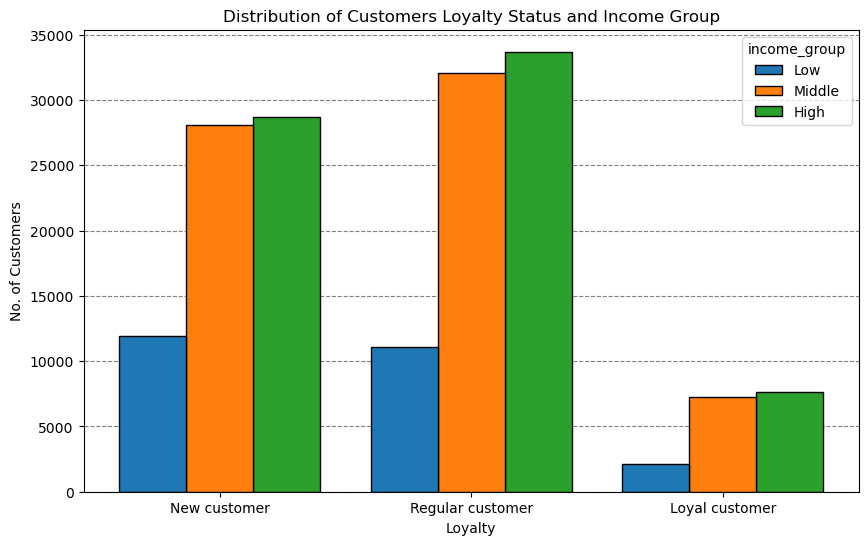

In [34]:
# HGistogram shows the count of customers in each income group by region
plt.figure(figsize=(10, 6))
# Plot the histogram bars
sns.histplot(data=user_sample, x='loyalty_flag', hue='income_group', multiple='dodge', shrink=.8, alpha=1)
# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')
# General formatting
plt.title('Distribution of Customers Loyalty Status and Income Group')
plt.ylabel('No. of Customers')
plt.xlabel('Loyalty')
# Save and show
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'instacart_income_by_loyalty.png'), bbox_inches = 'tight')
plt.show()

C:\Users\tiffk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


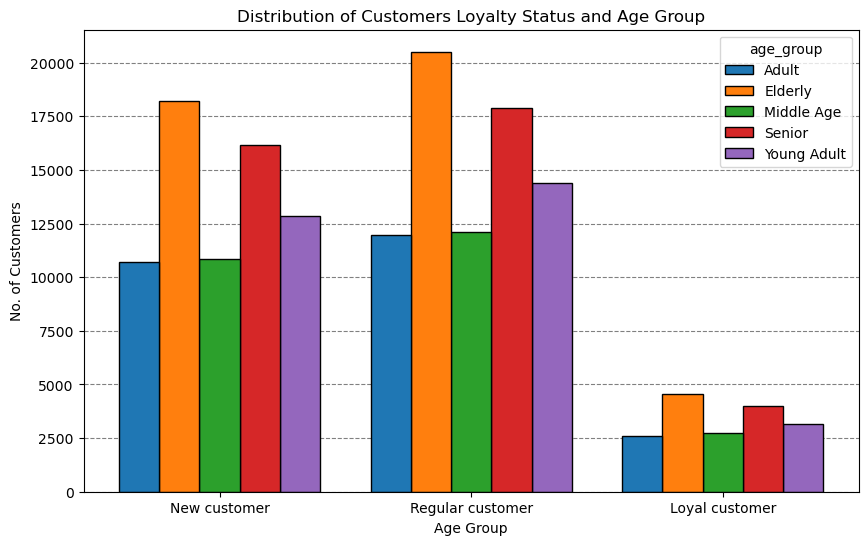

In [35]:
# HGistogram shows the count of customers in each income group by region
plt.figure(figsize=(10, 6))
# Plot the histogram bars
sns.histplot(data=user_sample, x='loyalty_flag', hue='age_group', multiple='dodge', shrink=.8, alpha=1)
# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')
# General formatting
plt.title('Distribution of Customers Loyalty Status and Age Group')
plt.ylabel('No. of Customers')
plt.xlabel('Age Group')
# Save and show
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'instacart_loyalty_by_age.png'), bbox_inches = 'tight')
plt.show()

C:\Users\tiffk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


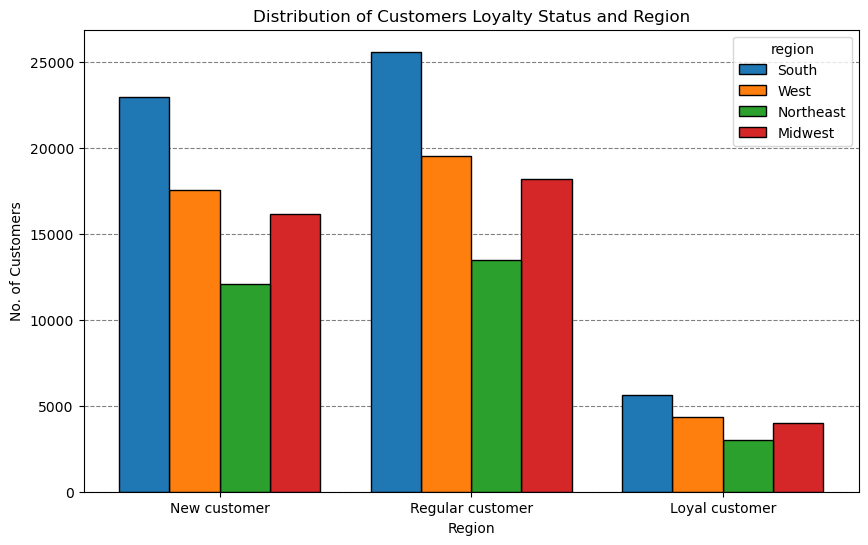

In [36]:
# HGistogram shows the count of customers in each income group by region
plt.figure(figsize=(10, 6))
# Plot the histogram bars
sns.histplot(data=user_sample, x='loyalty_flag', hue='region', multiple='dodge', shrink=.8, alpha=1)
# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')
# General formatting
plt.title('Distribution of Customers Loyalty Status and Region')
plt.ylabel('No. of Customers')
plt.xlabel('Region')
# Save and show
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'instacart_loyalty_by_region.png'), bbox_inches = 'tight')
plt.show()

C:\Users\tiffk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


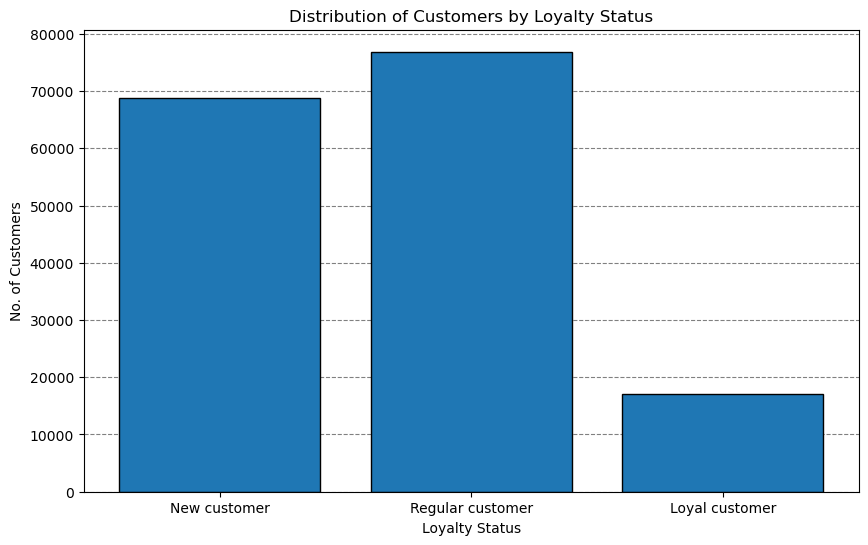

In [44]:
# HGistogram shows the count of customers in each income group by region
plt.figure(figsize=(10, 6))
# Plot the histogram bars
sns.histplot(data=user_sample, x='loyalty_flag', multiple='dodge', shrink=.8, alpha=1)
# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')
# General formatting
plt.title('Distribution of Customers by Loyalty Status')
plt.ylabel('No. of Customers')
plt.xlabel('Loyalty Status')
# Save and show
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'instacart_loyalty_by_customer_count.png'), bbox_inches = 'tight')
plt.show()

C:\Users\tiffk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


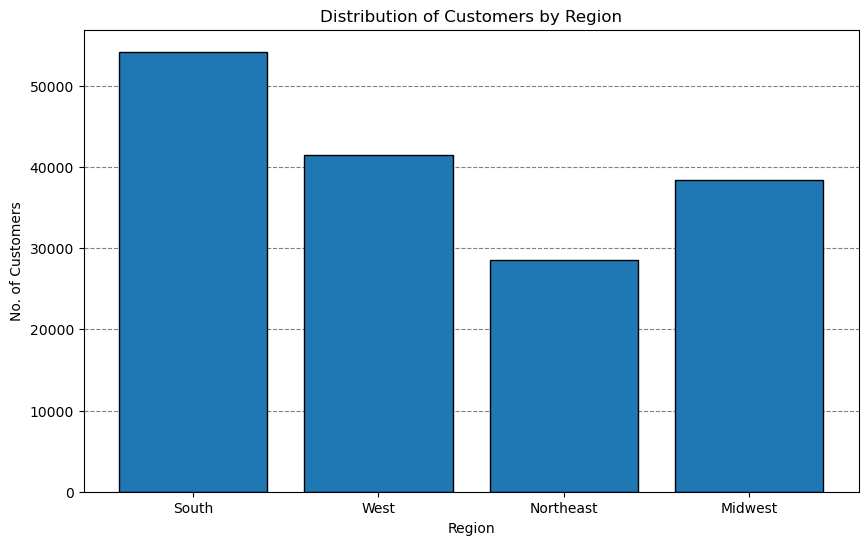

In [43]:
# HGistogram shows the count of customers in each income group by region
plt.figure(figsize=(10, 6))
# Plot the histogram bars
sns.histplot(data=user_sample, x='region', multiple='dodge', shrink=.8, alpha=1)
# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')
# General formatting
plt.title('Distribution of Customers by Region')
plt.ylabel('No. of Customers')
plt.xlabel('Region')
# Save and show
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'instacart_regional_customer_count.png'), bbox_inches = 'tight')
plt.show()

## Task 5 Check for a difference in expenditure (“prices” column) by hour of the day (Hint: Need to use an accurate sample for line chart)

In [ ]:
# HGistogram shows the count of customers in each income group by region
plt.figure(figsize=(10, 6))
# Plot the histogram bars
sns.histplot(data=user_sample, x='loyalty_flag', multiple='dodge', shrink=.8, alpha=1)
# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')
# General formatting
plt.title('Distribution of Customers Loyalty Status and Age Group')
plt.ylabel('No. of Customers')
plt.xlabel('Loyalty Status')
# Save and show
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'instacart_order_by_region.png'), bbox_inches = 'tight')
plt.show()

In [42]:
# Calculate the average amount spent per order by region
average_spent_per_region = user_sample.groupby('region')['amount_spent'].mean().reset_index()

# Create the bar plot for average amount spent per order by region
plt.figure(figsize=(10, 6))

# Plot the bar plot
sns.barplot(data=average_spent_per_region, x='region', y='amount_spent', alpha=1)

# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')

# General formatting
plt.title('Average Amount Spent per Order by Region')
plt.ylabel('Average Amount Spent')
plt.xlabel('Region')

# Save and show
path = 'your_save_path_here'  # Define your save path
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'average_spent_per_order_by_region.png'), bbox_inches='tight')
plt.show()

KeyError: 'Column not found: amount_spent'

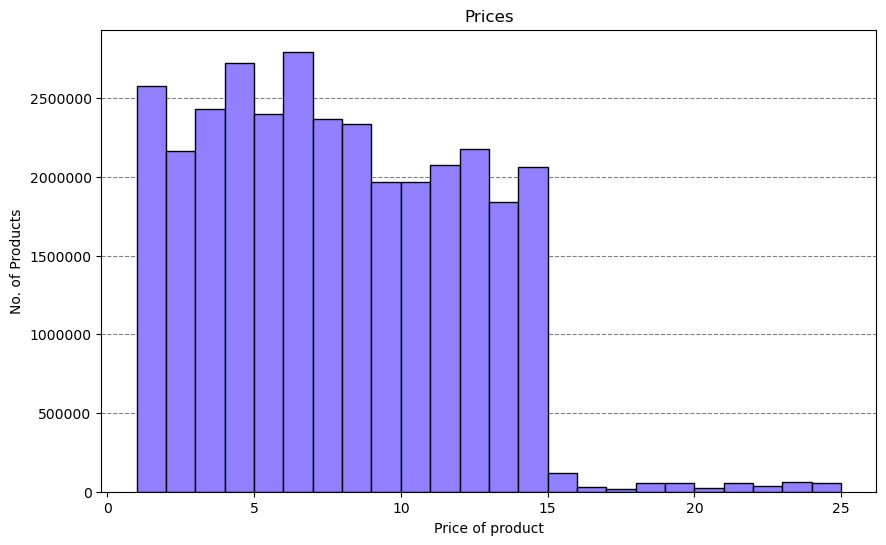

In [46]:
hist_2 = plt.figure(figsize = (10,6))
plt.ticklabel_format(style='plain')
ords_prods_all['prices'].plot.hist(bins = 24, 
                                              color = ['#9080ff'],
                                              zorder = 2, 
                                              edgecolor = 'black')
plt.title('Prices')
plt.xlabel('Price of product')
plt.ylabel('No. of Products')
plt.grid(axis = 'y', color = 'gray', linestyle = 'dashed')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'instacart_prices.png'), bbox_inches = 'tight')

In [48]:
ords_prods_all.head

<bound method NDFrame.head of           product_id                             product_name  aisle_id  \
0                196                                     Soda        77   
1              12427                      Original Beef Jerky        23   
2              14084  Organic Unsweetened Vanilla Almond Milk        91   
3              26088               Aged White Cheddar Popcorn        23   
4              26405         XL Pick-A-Size Paper Towel Rolls        54   
...              ...                                      ...       ...   
32399727       22920      Roasted & Salted Shelled Pistachios       117   
32399728       24852                                   Banana        24   
32399729       31477    High Protein Bar Chunky Peanut Butter         3   
32399730       38730          Brownie Crunch High Protein Bar         3   
32399731       39216     Original Multigrain Spoonfuls Cereal       121   

          department_id  prices  order_id  user_id  order_number  \
0

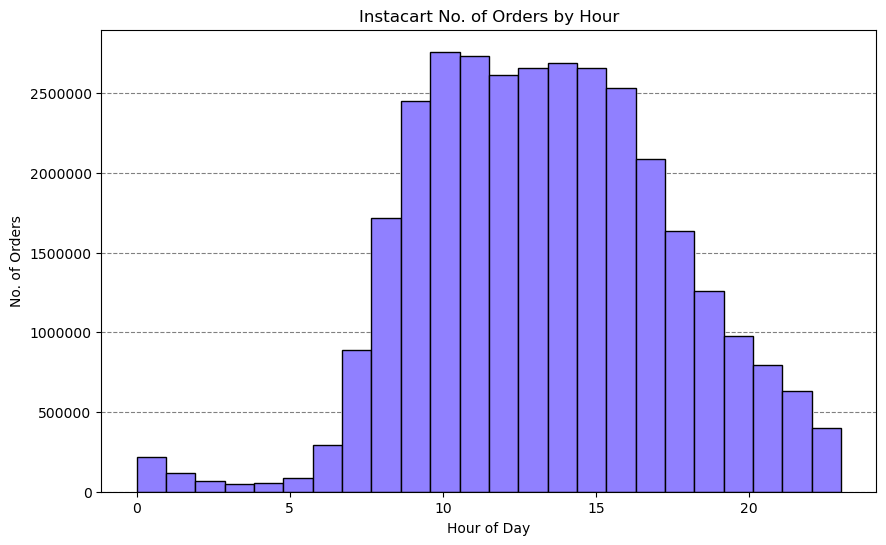

In [49]:
hist_2 = plt.figure(figsize = (10,6))
plt.ticklabel_format(style='plain')
ords_prods_all['order_hour_of_day'].plot.hist(bins = 24, 
                                              color = ['#9080ff'],
                                              zorder = 2, 
                                              edgecolor = 'black')
plt.title('Instacart No. of Orders by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('No. of Orders')
plt.grid(axis = 'y', color = 'gray', linestyle = 'dashed')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'instacart_orders_by_hour.png'), bbox_inches = 'tight')

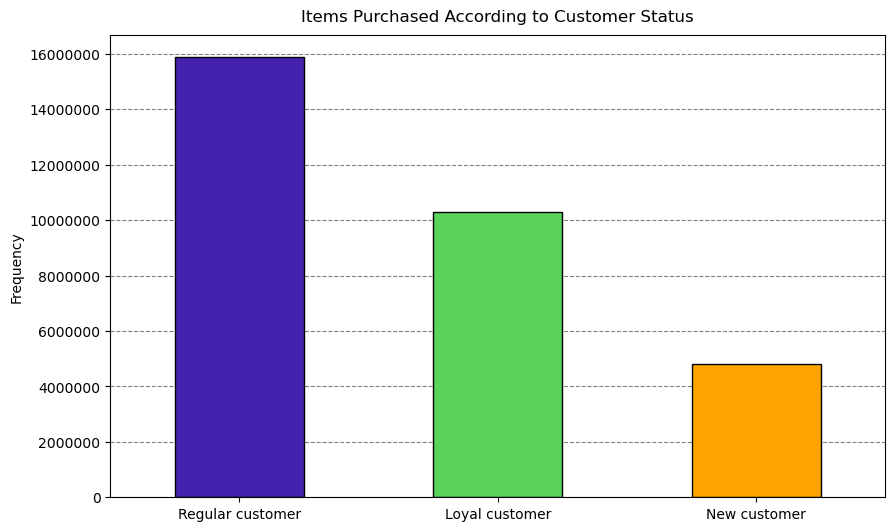

In [37]:
bar_2 = plt.figure(figsize = (10,6))
plt.ticklabel_format(style='plain')
ords_prods_all_in['loyalty_flag'].value_counts().plot.bar(color = ['#4421af', '#5ad45a', '#ffa300'],
                                                       zorder = 2, 
                                                       edgecolor = 'black')
plt.title('Items Purchased According to Customer Status', pad=10)
plt.xlabel('')
plt.ylabel('Frequency')
plt.xticks(rotation=0) 
plt.grid(axis = 'y', color = 'gray', linestyle = 'dashed')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'instacart_loyalty_vs_total_customer.png'), bbox_inches = 'tight')

In [44]:
# Using the small sample from earlier in this script, make a reduced dataframe of only the relevant columns:
df_3 = small[['prices', 'order_hour_of_day']]

C:\Users\tiffk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tiffk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


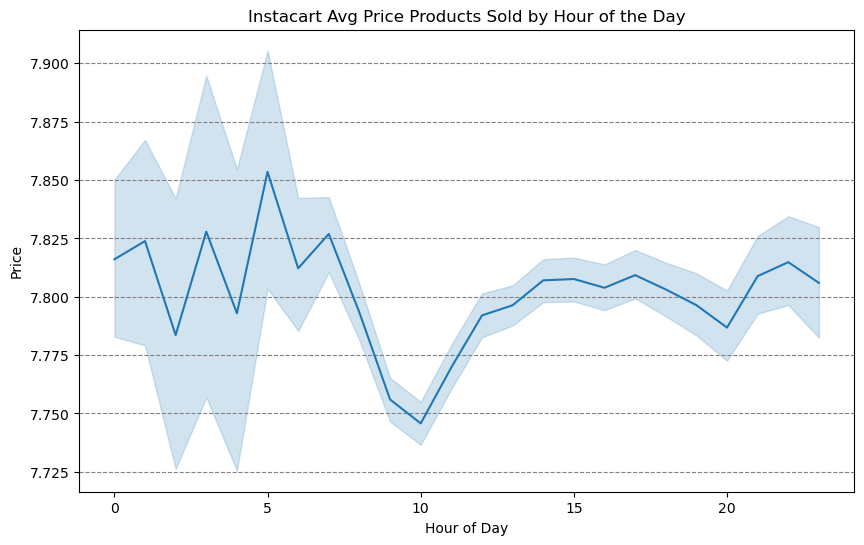

In [45]:
# Line chart:
plt.figure(figsize = (10, 6))
line_2 = sns.lineplot(data = df_3, x = 'order_hour_of_day', y = 'prices')
plt.title('Instacart Avg Price Products Sold by Hour of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Price')
plt.grid(axis = 'y', color = 'gray', linestyle = 'dashed')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'instacart_average_product_price_.png'), bbox_inches = 'tight')

## Task 6 Exploratory analysis of customer demographics: Check for a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents

In [32]:
# Will continue to use the small sample from earlier - create reduced dataframe with 'age' and 'n_dependants' column:
df_4 = small[['age', 'n_dependants']]

C:\Users\tiffk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tiffk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


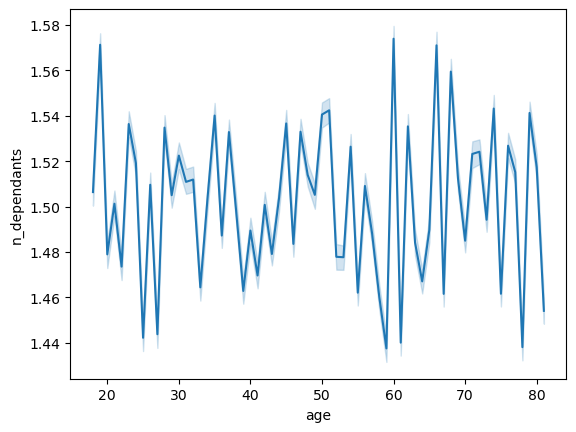

In [33]:
line_3 = sns.lineplot(data = df_4, x = 'age', y = 'n_dependants')

There is no clear trend or correlation between age and # of dependents (I realized I left the spelling error in the column name till I got to this point).

## Task 7 Check for a connection between age and income with a scatterplot.

In [34]:
# Reduce small sample to only relevant columns
df_5 = small[['age', 'income']]

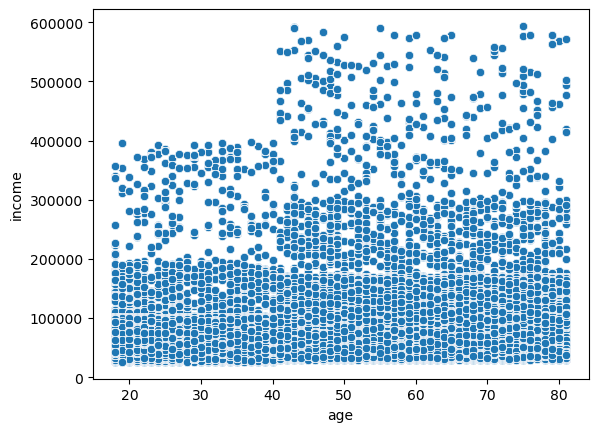

In [35]:
# Scatterplot using sample
scatterplot = sns.scatterplot(data = df_5, x = 'age', y = 'income')

## Task 8 Export visualizations

In [36]:
# Bar Chart - orders_day_of_week frequency

bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'frequency_of_orders_days_of_week.png'))

In [52]:
# Histogram - order_hour_of_day

hist_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'instacart_orders_by_hour.png'))

In [54]:
# Bar Chart - loyalty_flag

bar_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_flag_distribution.png'))

In [55]:
# Line Chart - prices (expenditure) vs order_hour_of_day

line_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'expenditure_vs_order_hour_of_day'))

In [56]:
# Line Chart - age vs number of dependants

line_3.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customers_age_vs_number_of_dependants.png'))

In [57]:
# Scatterplot - age vs income

scatterplot.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customers_age_vs_customers_income.png'))

In [55]:
ords_prods_all_in.loc[ords_prods_all_in['prices'] <= 2.5, 'price_range'] = 'Low'

In [57]:
ords_prods_all_in.loc[(ords_prods_all_in['prices'] > 2.5) & 
                    (ords_prods_all_in['prices'] <= 5), 'price_range'] = 'Mid_low'

In [58]:
ords_prods_all_in.loc[(ords_prods_all_in['prices'] > 5) & 
                    (ords_prods_all_in['prices'] <= 7.5), 'price_range'] = 'Mid'

In [60]:
ords_prods_all_in.loc[(ords_prods_all_in['prices'] > 7.5) & 
                    (ords_prods_all_in['prices'] <= 10), 'price_range'] = 'Mid_high'

In [63]:
ords_prods_all_in.loc[(ords_prods_all_in['prices'] > 10) & 
                    (ords_prods_all_in['prices'] <= 12.5), 'price_range'] = 'Mid_high'

In [64]:
ords_prods_all_in.loc[ords_prods_all_in['prices'] > 12.5, 'price_range'] = 'High'

In [1]:
# Price range setup
ords_prods_all_in.loc[ords_prods_all_in['prices'] <= 2.5, 'price_range'] = 'Low'
ords_prods_all_in.loc[(ords_prods_all_in['prices'] > 2.5) & 
                    (ords_prods_all_in['prices'] <= 5), 'price_range'] = 'Mid_low'
ords_prods_all_in.loc[(ords_prods_all_in['prices'] > 5) & 
                    (ords_prods_all_in['prices'] <= 7.5), 'price_range'] = 'Mid'
ords_prods_all_in.loc[(ords_prods_all_in['prices'] > 7.5) & 
                    (ords_prods_all_in['prices'] <= 10), 'price_range'] = 'Mid_high'
ords_prods_all_in.loc[(ords_prods_all_in['prices'] > 10) & 
                    (ords_prods_all_in['prices'] <= 12.5), 'price_range'] = 'Mid_high'
ords_prods_all_in.loc[ords_prods_all_in['prices'] > 12.5, 'price_range'] = 'High'

NameError: name 'ords_prods_all_in' is not defined

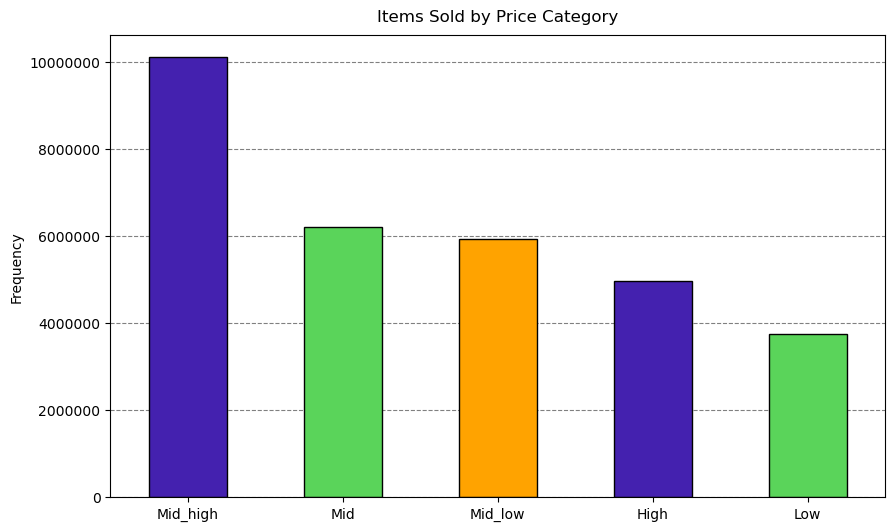

In [65]:
bar_2 = plt.figure(figsize = (10,6))
plt.ticklabel_format(style='plain')
ords_prods_all_in['price_range'].value_counts().plot.bar(color = ['#4421af', '#5ad45a', '#ffa300'],
                                                       zorder = 2, 
                                                       edgecolor = 'black')
plt.title('Items Sold by Price Category', pad=10)
plt.xlabel('')
plt.ylabel('Frequency')
plt.xticks(rotation=0) 
plt.grid(axis = 'y', color = 'gray', linestyle = 'dashed')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'instacart_price_categories2.png'), bbox_inches = 'tight')

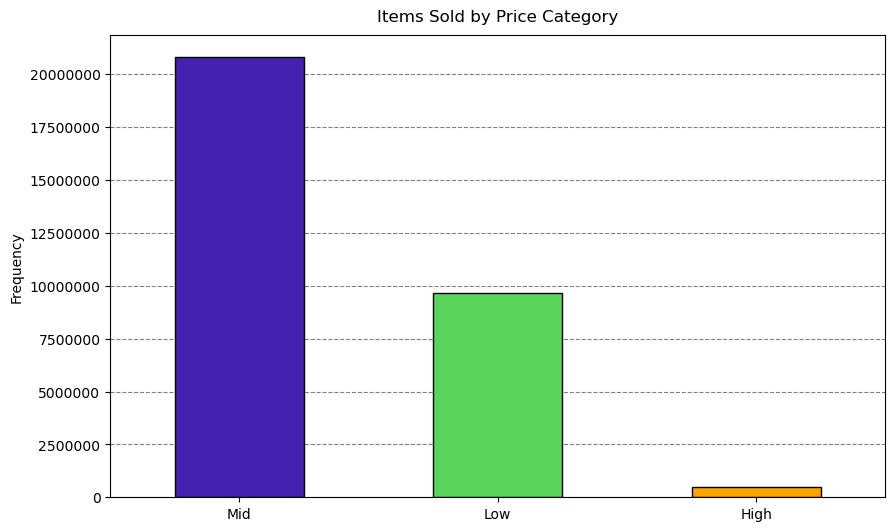

In [54]:
bar_2 = plt.figure(figsize = (10,6))
plt.ticklabel_format(style='plain')
ords_prods_all_in['price_range'].value_counts().plot.bar(color = ['#4421af', '#5ad45a', '#ffa300'],
                                                       zorder = 2, 
                                                       edgecolor = 'black')
plt.title('Items Sold by Price Category', pad=10)
plt.xlabel('')
plt.ylabel('Frequency')
plt.xticks(rotation=0) 
plt.grid(axis = 'y', color = 'gray', linestyle = 'dashed')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'instacart_price_categories2.png'), bbox_inches = 'tight')